In [1]:
from Bio import SeqIO
from BCBio import GFF
import numpy as np
import pandas as pd

## Parse data

In [2]:
sequence_fasta = '/home/Anton2008/projects/my_github/dna_ai/data/chromosome1.fasta'# последовательность 
gene_data_gff = '/home/Anton2008/projects/my_github/dna_ai/data/genomic.gff' # описание последовательности  

In [3]:
source = "BestRefSeq"

In [4]:
with open(sequence_fasta) as file:
    seq_dict = SeqIO.to_dict(SeqIO.parse(file, "fasta"))


In [5]:
record_id = list(seq_dict.keys())[0]
record_id

'NC_000001.11'

In [6]:
limit_info = dict(gff_id=[record_id,], gff_source=[source,])

In [7]:
with open(gene_data_gff) as file:
    gen_data = next(GFF.parse(file, limit_info=limit_info, base_dict=seq_dict))
        
        

In [8]:
len(gen_data.features)

3177

In [9]:
len(gen_data.seq)

248956422

In [10]:
gen_data.features[0].location.end

ExactPosition(14409)

In [11]:
target_mask = np.zeros(len(gen_data.seq))
target = "CDS"

def dfs(feature, target_mask):
    for feature in feature.sub_features:
        if feature.type == target:
            start_index = int(feature.location.start)
            end_index = int(feature.location.end)
            if not np.all(target_mask[start_index:end_index]):
                target_mask[start_index:end_index] = 1
        dfs(feature, target_mask)


for feature in gen_data.features:
    if feature.type == target:
        start_index = int(feature.location.start)
        end_index = int(feature.location.end)
        if not np.all(target_mask[start_index:end_index]):
            target_mask[start_index:end_index] = 1
    dfs(feature, target_mask)

In [12]:
3512527.0 / len(target_mask)

0.01410900338212605

In [13]:
def make_masked_sequence(sequence: list):
    masked_sequence = np.zeros((len(sequence), 5), dtype=int) # columns are A, C, G, T, N
    letter_index_dict = {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3,
        'N': 4
    }
    for i in range(len(sequence)):
         
         if sequence[i] not in letter_index_dict:    # if letter is unclear, make in N as NaN
               column = letter_index_dict['N']
         else:
               column = letter_index_dict[sequence[i]]
         masked_sequence[i][column] = 1
    return masked_sequence

In [15]:
sequence = list(gen_data.seq)

In [4]:
mem = list('ASdasdasdsdasda')

In [22]:
kek = make_masked_sequence(sequence)

In [82]:
len(target_mask)



248956422

In [134]:
types = []
count = 0
for feature in gen_data.features:
    if feature.type == 'mRNA':
        count += 1
        print(feature.extract)
    if feature.type not in types:
        types.append(feature.type)
print(types, count)

<bound method SeqFeature.extract of SeqFeature(FeatureLocation(ExactPosition(685715), ExactPosition(686654), strand=-1), type='mRNA', id='rna-NM_001005277.1')>
<bound method SeqFeature.extract of SeqFeature(FeatureLocation(ExactPosition(960583), ExactPosition(965719), strand=1), type='mRNA', id='rna-NM_198317.3')>
<bound method SeqFeature.extract of SeqFeature(FeatureLocation(ExactPosition(1242452), ExactPosition(1246722), strand=-1), type='mRNA', id='rna-NM_001014980.3')>
<bound method SeqFeature.extract of SeqFeature(FeatureLocation(ExactPosition(1292390), ExactPosition(1307930), strand=-1), type='mRNA', id='rna-NM_030649.3')>
<bound method SeqFeature.extract of SeqFeature(FeatureLocation(ExactPosition(1324801), ExactPosition(1328896), strand=1), type='mRNA', id='rna-NM_001029885.2')>
<bound method SeqFeature.extract of SeqFeature(FeatureLocation(ExactPosition(1331279), ExactPosition(1335314), strand=1), type='mRNA', id='rna-NM_152228.3')>
<bound method SeqFeature.extract of SeqFeatu

In [4]:
import numpy as np

In [14]:
def making_masked_sequence(sequence: list):
    masked_sequence = np.zeros((len(sequence), 5)) # columns are A, C, G, T, N
    letter_index_dict = {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3,
        'N': 4
    }
    for i, letter in enumerate(sequence):
         if letter not in letter_index_dict:    # if letter is unclear, make in N as NaN
              letter = 'N'
         column = letter_index_dict[letter]
         masked_sequence[i][column] = 1

    return masked_sequence
    

In [15]:
making_masked_sequence(list('SUKA'))

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [ ]:
aa

In [ ]:
data.head()
data.shape

(4718553, 8)

In [11]:
unique_types = data['Type'].unique()
print(unique_types)


['region' 'pseudogene' 'transcript' 'exon' 'gene' 'primary_transcript'
 'miRNA' 'enhancer' 'biological_region' 'lnc_RNA' 'mRNA' 'CDS' 'snRNA'
 'silencer' 'transcriptional_cis_regulatory_region'
 'meiotic_recombination_region' 'repeat_instability_region'
 'nucleotide_motif' 'tandem_repeat' 'snoRNA' 'CAGE_cluster'
 'DNaseI_hypersensitive_site' 'epigenetically_modified_region' 'ncRNA'
 'antisense_RNA' 'non_allelic_homologous_recombination_region' 'tRNA'
 'promoter' 'conserved_region' 'enhancer_blocking_element'
 'mobile_genetic_element' 'minisatellite' 'protein_binding_site'
 'locus_control_region' 'centromere' 'V_gene_segment' 'response_element'
 'TATA_box' 'sequence_comparison' 'rRNA' 'sequence_feature'
 'sequence_alteration' 'match' 'cDNA_match' 'insulator'
 'matrix_attachment_site' 'repeat_region' 'regulatory_region'
 'sequence_secondary_structure' 'C_gene_segment' 'J_gene_segment'
 'origin_of_replication' 'mitotic_recombination_region' 'telomerase_RNA'
 'CAAT_signal' 'dispersed_repea

In [12]:
unique_source = data['Source'].unique()
print(unique_source)

unique_source1 = data['Source'].value_counts()
# Sort the unique sources based on their frequency
unique_source_sorted = unique_source1.sort_values(ascending=False)

print(unique_source_sorted)

['RefSeq' 'BestRefSeq' 'RefSeqFE' 'Gnomon' 'Curated Genomic' 'cmsearch'
 'BestRefSeq%2CGnomon' 'tRNAscan-SE']
Gnomon                 2367884
BestRefSeq             1991671
RefSeqFE                176817
RefSeq                  136213
Curated Genomic          29238
BestRefSeq%2CGnomon      11308
cmsearch                  3372
tRNAscan-SE               2050
Name: Source, dtype: int64


In [13]:
type_counts = data['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
type_counts.head(20)

,Type,Count
0,exon,2301289
1,CDS,1836136
2,mRNA,144447
3,match,107863
4,biological_region,83821
5,enhancer,81572
6,gene,47876
7,lnc_RNA,32088
8,cDNA_match,25870
9,pseudogene,19251


In [14]:
data.shape

(4718553, 8)

In [15]:
data_chr_1_BestRefSeq = data[(data['Seqid']=='NC_000001.11') & (data['Source']=='BestRefSeq')]
data_chr_1_BestRefSeq.head(30)

duplicate_counts = data_chr_1_BestRefSeq.duplicated().value_counts()
print(duplicate_counts)
df_no_duplicates = data_chr_1_BestRefSeq.drop_duplicates()
df_no_duplicates.head(30)
df_no_duplicates.shape

True     112580
False     56676
dtype: int64


(56676, 8)

In [16]:
112580 + 56676 

169256

In [17]:
type_counts2 = df_no_duplicates['Type'].value_counts().reset_index()
type_counts2.columns = ['Type', 'Count']
type_counts2.head(20)

,Type,Count
0,exon,27855
1,CDS,22309
2,mRNA,3123
3,gene,1687
4,lnc_RNA,601
5,transcript,495
6,miRNA,235
7,primary_transcript,157
8,pseudogene,119
9,snoRNA,47


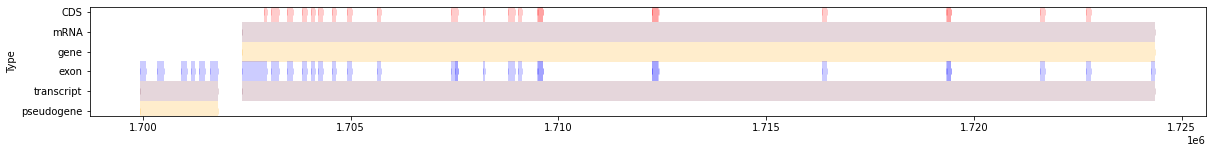

,Seqid,Source,Type,Start,End,Score,Strand,Phase
7376,NC_000001.11,BestRefSeq,pseudogene,1699939,1701808,NaN,+,NaN
7377,NC_000001.11,BestRefSeq,transcript,1699939,1701808,NaN,+,NaN
7378,NC_000001.11,BestRefSeq,exon,1699939,1700072,NaN,+,NaN
7379,NC_000001.11,BestRefSeq,exon,1700347,1700514,NaN,+,NaN
7380,NC_000001.11,BestRefSeq,exon,1700907,1701071,NaN,+,NaN
7381,NC_000001.11,BestRefSeq,exon,1701148,1701258,NaN,+,NaN
7382,NC_000001.11,BestRefSeq,exon,1701361,1701487,NaN,+,NaN
7383,NC_000001.11,BestRefSeq,exon,1701608,1701808,NaN,+,NaN
7384,NC_000001.11,BestRefSeq,gene,1702379,1724357,NaN,-,NaN
7385,NC_000001.11,BestRefSeq,transcript,1702379,1724357,NaN,-,NaN


In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# # Пример данных
# data = {
#     'Type': ['exon', 'cds', 'gene', 'exon', 'cds'],
#     'Start': [100, 200, 300, 400, 500],
#     'End': [150, 250, 350, 450, 550]
# }

# df = pd.DataFrame(data)

# Задание цветов для каждого типа элемента
color = (0.5, 0.2, 0.3)
type_colors = {
    'exon': 'blue',
    'cds': 'red',
    'gene': 'orange',
    'pseudogene': 'orange',
    'transcript':color,
    'primary_transcript':color,
    'miRNA':color,
    'lnc_RNA':color,
    'mRNA':color,
    'CDS':'red',
    'snoRNA':color,
    'enhancer':color,
    'biological_region':color,
    'silencer':color,
    'epigenetically_modified_region':color,
    
}

# Создание графика
fig, ax = plt.subplots()

a = 1230
dd = df_no_duplicates.iloc[0+a:a+57]

# Отрисовка элементов
for index, row in dd.iterrows():
    y = row['Type'] 
    x_start = int(row['Start'])
    x_end = int(row['End'])
    ax.plot([x_start, x_end], [y, y], color=type_colors[row['Type']], linewidth=20, marker='|',alpha =0.2, solid_capstyle='butt' )



    
    
# Настройка осей и меток
# ax.set_xlabel('Position')
ax.set_ylabel('Type')
ax.set_yticks(dd['Type'].unique())
ax.set_yticklabels(dd['Type'].unique())

fig.set_size_inches(20, 2)
#ax.grid(True)

# Отображение графика
plt.savefig('graph_chromosome.png', dpi=700,facecolor='white')
plt.show()


dd.head(30)


In [19]:
# exons = data[(data['Type']=='exon') & (data['Seqid']=='NC_000001.11') & (data['Source']=='BestRefSeq')]
# genes = data[(data['Type']=='gene') & (data['Seqid']=='NC_000001.11') & (data['Source']=='BestRefSeq')]
cds = df_no_duplicates[(data['Type']=='CDS') & (data['Seqid']=='NC_000001.11') & (data['Source']=='BestRefSeq')]

# genes.loc[:, 'Start'] = genes.loc[:, 'Start'].astype('int')
# genes.loc[:, 'End'] = genes.loc[:, 'End'].astype('int')

# exons.loc[:, 'Start'] = exons.loc[:, 'Start'].astype('int')
# exons.loc[:, 'End'] = exons.loc[:, 'End'].astype('int')

cds.loc[:, 'Start'] = cds.loc[:, 'Start'].astype('int')
cds.loc[:, 'End'] = cds.loc[:, 'End'].astype('int')

/var/folders/dy/76wm8jgj50vc8kygzhcz93jw0000gn/T/ipykernel_23842/4273512516.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cds = df_no_duplicates[(data['Type']=='CDS') & (data['Seqid']=='NC_000001.11') & (data['Source']=='BestRefSeq')]
/var/folders/dy/76wm8jgj50vc8kygzhcz93jw0000gn/T/ipykernel_23842/4273512516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cds.loc[:, 'Start'] = cds.loc[:, 'Start'].astype('int')
/var/folders/dy/76wm8jgj50vc8kygzhcz93jw0000gn/T/ipykernel_23842/4273512516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [34]:
cds.to_csv('cds.csv', index=False)

In [35]:
cds.shape

(22309, 8)

In [36]:
# cds_short = cds[:40000]
# print (cds_short.shape)
# cds_short.head()

In [37]:
cds_short = cds

In [38]:

    
segments = []
for _, row in cds_short.iterrows():
    start = row['Start']
    end = row['End']
    segment = sequence[start-1:end]  # Извлечение отрезка, индексы начинаются с 0
    segments.append(segment)

#print(segments)


In [39]:
cds_short = cds_short.copy()
cds_short.loc[:, 'segments'] = segments
cds_short.head()

,Seqid,Source,Type,Start,End,Score,Strand,Phase,segments
50,NC_000001.11,BestRefSeq,CDS,65565,65573,NaN,+,0,ATGAAGAAG
51,NC_000001.11,BestRefSeq,CDS,69037,70008,NaN,+,0,GTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGAGTGAAACGA...
285,NC_000001.11,BestRefSeq,CDS,450740,451678,NaN,-,0,TTATGAGATCCTCTTGTAAATCACTAGCTGTTTGCATACTCTCTTT...
362,NC_000001.11,BestRefSeq,CDS,685716,686654,NaN,-,0,TTATGAGATCCTCTTGTAAATCACTAGCTGTTTGCATACTCTCTTT...
557,NC_000001.11,BestRefSeq,CDS,924432,924948,NaN,+,0,ATGCCGGCGGTCAAGAAGGAGTTCCCGGGCCGCGAGGACCTGGCCC...


In [40]:
cds_short['segment_length'] = cds_short['segments'].str.len()
cds_short.head()

,Seqid,Source,Type,Start,End,Score,Strand,Phase,segments,segment_length
50,NC_000001.11,BestRefSeq,CDS,65565,65573,NaN,+,0,ATGAAGAAG,9
51,NC_000001.11,BestRefSeq,CDS,69037,70008,NaN,+,0,GTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGAGTGAAACGA...,972
285,NC_000001.11,BestRefSeq,CDS,450740,451678,NaN,-,0,TTATGAGATCCTCTTGTAAATCACTAGCTGTTTGCATACTCTCTTT...,939
362,NC_000001.11,BestRefSeq,CDS,685716,686654,NaN,-,0,TTATGAGATCCTCTTGTAAATCACTAGCTGTTTGCATACTCTCTTT...,939
557,NC_000001.11,BestRefSeq,CDS,924432,924948,NaN,+,0,ATGCCGGCGGTCAAGAAGGAGTTCCCGGGCCGCGAGGACCTGGCCC...,517


In [41]:
even_count = len(cds_short[cds_short['segment_length'] % 2 == 0])
odd_count = len(cds_short[cds_short['segment_length'] % 2 != 0])

print("Четные значения:", even_count)
print("Нечетные значения:", odd_count)


Четные значения: 10982
Нечетные значения: 11327


In [42]:
lengths = [len(segment) for segment in segments]

max_length = max(lengths)
min_length = min(lengths)
average_length = sum(lengths) / len(lengths)

print("Максимальная длина: ", max_length)
print("Минимальная длина: ", min_length)
print("Средняя длина: ", average_length)

Максимальная длина:  12048
Минимальная длина:  1
Средняя длина:  167.95647496526067


In [43]:
len(lengths)

22309

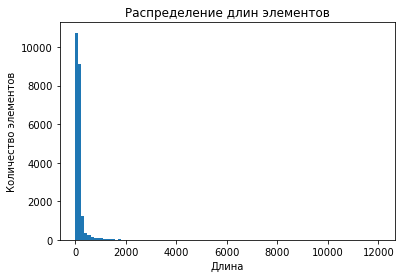

In [44]:
import matplotlib.pyplot as plt

lengths = [len(segment) for segment in segments]

# Построение гистограммы
plt.hist(lengths, bins=100)
plt.xlabel('Длина')
plt.ylabel('Количество элементов')
plt.title('Распределение длин элементов')
plt.show()

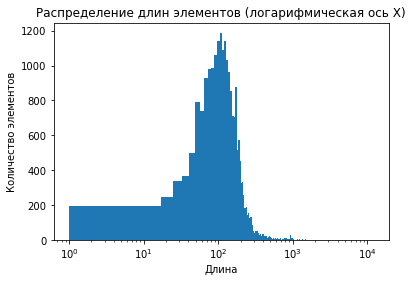

In [45]:
import matplotlib.pyplot as plt

lengths = [len(segment) for segment in segments]

# Построение гистограммы с логарифмической осью X
plt.hist(lengths, bins=1500)
plt.xscale('log')
plt.xlabel('Длина')
plt.ylabel('Количество элементов')
plt.title('Распределение длин элементов (логарифмическая ось X)')

plt.show()


In [46]:
cds_short = cds_short[(cds_short['segments'].str.len() >= 9) & (cds_short['segments'].str.len() <= 300)]


In [47]:
print (cds_short.shape)
cds_short.head()

(20562, 10)


,Seqid,Source,Type,Start,End,Score,Strand,Phase,segments,segment_length
50,NC_000001.11,BestRefSeq,CDS,65565,65573,NaN,+,0,ATGAAGAAG,9
558,NC_000001.11,BestRefSeq,CDS,925922,926013,NaN,+,2,GGAAAAGTCTGAAGACGCTTATGTCCAAGGGGATCCTGCAGGTGCA...,92
559,NC_000001.11,BestRefSeq,CDS,930155,930336,NaN,+,0,AACCGGGGGCGGCTGGCAGACAAGAGGACAGTCGCCCTGCCTGCCG...,182
560,NC_000001.11,BestRefSeq,CDS,931039,931089,NaN,+,1,AGTCCACACCCACTGGGACGTGAACATCTCTTTCCGAGAGGCGTCC...,51
561,NC_000001.11,BestRefSeq,CDS,935772,935896,NaN,+,1,CCAGGACGGCAACCTTCCCACCCTCATATCCAGCGTCCACCGCAGC...,125


In [ ]:
# новый парсер как бы

In [148]:
len(sequence)

248956422

In [152]:
import pandas as pd

def slice_sequence(sequence1, chunk_length, step):
    chunks = []
    for i in range(0, len(sequence1), step):
        start = i
        end = min(i + chunk_length, len(sequence1))
        chunk = sequence1[start:end]
        chunks.append((start, end, chunk))
    df = pd.DataFrame(chunks, columns=['Start', 'End', 'Sequence'])
    return df


# Пример использования
sequence_tr = sequence[0:248900000]
chunk_length = 1000
step = 700


result_df = slice_sequence(sequence_tr, chunk_length, step)
result_df.tail()
data_test = result_df


In [151]:
cds_short.shape

(20562, 10)

In [153]:
import pandas as pd
import numpy as np

# Пример данных
df1 = data_test
df2 = cds_short[0:20000]

# Функция для проверки наличия второго датафрейма внутри первого
def check_inside(row):
    inside = df2.loc[(df2['Start']-1 >= row['Start']) & (df2['End']-1 <= row['End'])]
    count = len(inside)
    if count > 0:
        start_f = inside['Start'].tolist()
        end_f = inside['End'].tolist()
    else:
        count = 0
        start_f = [0]
        end_f = [0]
    row['Inside_Check'] = int(count > 0)
    row['Inside_Count'] = count
    row['Start_f'] = np.nan if count == 0 else start_f
    row['End_f'] = np.nan if count == 0 else end_f
    return row

# Применение функции к каждой строке первого датафрейма
df1 = df1.apply(check_inside, axis=1)

# Замена значений в столбце Inside_Check
# df1['Inside_Check'] = df1['Inside_Check'].map({True: 1, False: 0})

# Заполнение нулями вместо np.nan
df1['Start_f'] = df1['Start_f'].fillna(0)
df1['End_f'] = df1['End_f'].fillna(0)

# print(df1)

# print (df1)

df1 = df1.loc[~df1['Sequence'].str.contains('N')]
print(df1)



            Start        End  \
15          10500      11500   
16          11200      12200   
17          11900      12900   
18          12600      13600   
19          13300      14300   
...           ...        ...   
355567  248896900  248897900   
355568  248897600  248898600   
355569  248898300  248899300   
355570  248899000  248900000   
355571  248899700  248900000   

                                                 Sequence  Inside_Check  \
15      TCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAA...             0   
16      GCTTGCTCACGGTGCTGTGCCAGGGCGCCCCCTGCTGGCGACTAGG...             0   
17      TTCTTTCTGTTCATGTGTATTTGCTGTCTCTTAGCCCAGACTTCCC...             0   
18      GTCTCCCCCCAGGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGC...             0   
19      ACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCT...             0   
...                                                   ...           ...   
355567  ATCACACTTTTCCCATGGATCTTTGCAACCCATAGATCAGGATGTA...             0   
355568  AGTCAGC

In [154]:
df1.to_csv('from_parser_2__reserve_whole_h1.csv', index=False)

In [161]:
print (df1.loc[df1['Inside_Count'] ==5])

            Start        End  \
1874      1311800    1312800   
1934      1353800    1354800   
2321      1624700    1625700   
3698      2588600    2589600   
9232      6462400    6463400   
24252    16976400   16977400   
33991    23793700   23794700   
39087    27360900   27361900   
51684    36178800   36179800   
51685    36179500   36180500   
57577    40303900   40304900   
61949    43364300   43365300   
62815    43970500   43971500   
64762    45333400   45334400   
65175    45622500   45623500   
67048    46933600   46934600   
67349    47144300   47145300   
100357   70249900   70250900   
156115  109280500  109281500   
215013  150509100  150510100   
215081  150556700  150557700   
219128  153389600  153390600   
219129  153390300  153391300   
220491  154343700  154344700   
221623  155136100  155137100   
221625  155137500  155138500   
221714  155199800  155200800   
222301  155610700  155611700   
223207  156244900  156245900   
229998  160998600  160999600   
229999  

In [162]:
import pandas as pd

# # Пример данных
# df1 = pd.DataFrame({'Start': [100, 200, 300], 'End': [500, 600, 700]})

# Добавление столбца 'Mask' со строками из 0 длиной 1000
df1['Mask'] = '0' * 1000

# Функция для замены части нулей на единицы
def replace_with_ones(row):
    if row['Inside_Check'] == 1 and isinstance(row['Start_f'], list) and isinstance(row['End_f'], list):
        sequence_list = list(row['Mask'])
        for start_f, end_f in zip(row['Start_f'], row['End_f']):
            start_in = start_f - row['Start']
            end_in = end_f - row['Start']
            sequence_list[start_in: end_in+1] = '1' * (end_in - start_in + 1)
        sequence = ''.join(sequence_list)
        return sequence
    return row['Mask']

# Применение функции к каждой строке датафрейма
df1['Mask'] = df1.apply(replace_with_ones, axis=1)

# Замена значений в столбце Inside_Check на 1 и 0
df1['Inside_Check'] = df1['Inside_Check'].apply(lambda x: 1 if x else 0)

# print(df1)


In [163]:
count_per_value = df1['Inside_Count'].value_counts()
print(count_per_value)

print (df1.loc[df1['Inside_Count'] == 1])

0     309230
1      15721
2       3246
3        674
4        148
5         36
6          6
8          3
9          2
7          2
11         1
Name: Inside_Count, dtype: int64
            Start        End  \
93          65100      66100   
1328       929600     930600   
1329       930300     931300   
1330       931000     932000   
1336       935200     936200   
...           ...        ...   
338230  236761000  236762000   
338231  236761700  236762700   
338232  236762400  236763400   
338279  236795300  236796300   
338290  236803000  236804000   

                                                 Sequence  Inside_Check  \
93      AATTTTTCTATATTTTCTCCGCAAGTTGGTCATAAAAGTTCTAAGC...             1   
1328    GGATTGGCAGGCAGATACACGGAGGGAACGTGCGCATTTGAGTGCA...             1   
1329    GGAGGATGGTCCGCACATCCGTATCATGAAGAGAAGGTACTTGGAC...             1   
1330    TCCAGAGCAACATGGACCTTCTGCTTCCCTTCCTGCAGAGTCCACA...             1   
1336    CAGCGGGAGGTTGGAGCACGCAGCCCTGGTGCCTGGTGCGAGCTGC...       

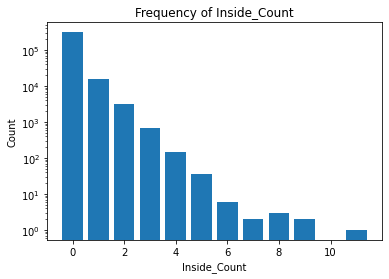

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

count_per_value = df1['Inside_Count'].value_counts()

# Создание графика
plt.bar(count_per_value.index, count_per_value.values)

# Настройка осей и заголовка
plt.xlabel('Inside_Count')
plt.ylabel('Count')
plt.title('Frequency of Inside_Count')

# Установка логарифмического масштаба по оси y
plt.yscale('log')

# Показ графика
plt.show()


In [118]:
nom = 93
print (df1.loc[nom].Mask)

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [119]:
print (df1.loc[nom].Sequence)

AATTTTTCTATATTTTCTCCGCAAGTTGGTCATAAAAGTTCTAAGCATTCCTCTTTTTATAAAATCGAAGCATTATTACTTACTCTCTTGTTAACCTATCTGGATTTTAATTTTGTAACTTTATTATATTTGTTTTGCTGTGATTCTTTAAAAAGCACCTTTAGACTCAGTGAGATAGCAAAAATATCCAAATAGGCCAAAAAATTGTGGCAATGTCCTCTCACTCAGGAAAATTCTGTGTGTTTTCTCTAATGGCCAAGGGAAAACTTGTGAGACTATAAAAGTTAGTCTCAGTACACAAAGCTCAGACTGGCTATTCCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTAATTAACCAAGTGGTTTACTAAAAAGGACAATTCACTACATATTATTCTCTTACAGTTTTTATGCCTCATTCTGTGAAAATTGCTGTAGTCTCTTCCAGTTATGAAGAAGGTAGGTGGAAACAAAGACAAAACACATATATTAGAAGAATGAATGAAATTGTAGCATTTTATTGACAATGAGATGGTTCTATTAGTAGGAATCTATTCTGCATAATTCCATTTTGTGTTTACCTTCTGGAAAAATGAAAGGATTCTGTATGGTTAACTTAAATACTTAGAGAAATTAATATGAATAATGTTAGCAAGAATAACCCTTGTTATAAGTATTATGCTGGCAACAATTGTCGAGTCCTCCTCCTCACTCTTCTGGGCTAATTTGTTCTTTTCTCCCCATTTAATAGTCCTTTTCCCCATCTTTCCCCAGGTCCGGTGTTTTCTTACCCACCTCCTTCCCTCCTTTTTATAATACCAGTGAAACTTGGTTTGGAGCATTTCTTTCACATAAAGGTACAAATCATACTGCTAGAGTTGTGAGGATTTTTACAGCTTTTGAAAGAATAAACTCATTTTAAAAACAGGAAAGCTAAGGCCCAGAGATTTTTAAATGATATTCCCATGATCACACTGTGAATTTGT

In [120]:
result = ""

nom = 93


for i in range(len(df1.loc[nom].Sequence)):
    result += df1.loc[nom].Sequence[i] + df1.loc[nom].Mask[i]

print(result)

A0A0T0T0T0T0T0C0T0A0T0A0T0T0T0T0C0T0C0C0G0C0A0A0G0T0T0G0G0T0C0A0T0A0A0A0A0G0T0T0C0T0A0A0G0C0A0T0T0C0C0T0C0T0T0T0T0T0A0T0A0A0A0A0T0C0G0A0A0G0C0A0T0T0A0T0T0A0C0T0T0A0C0T0C0T0C0T0T0G0T0T0A0A0C0C0T0A0T0C0T0G0G0A0T0T0T0T0A0A0T0T0T0T0G0T0A0A0C0T0T0T0A0T0T0A0T0A0T0T0T0G0T0T0T0T0G0C0T0G0T0G0A0T0T0C0T0T0T0A0A0A0A0A0G0C0A0C0C0T0T0T0A0G0A0C0T0C0A0G0T0G0A0G0A0T0A0G0C0A0A0A0A0A0T0A0T0C0C0A0A0A0T0A0G0G0C0C0A0A0A0A0A0A0T0T0G0T0G0G0C0A0A0T0G0T0C0C0T0C0T0C0A0C0T0C0A0G0G0A0A0A0A0T0T0C0T0G0T0G0T0G0T0T0T0T0C0T0C0T0A0A0T0G0G0C0C0A0A0G0G0G0A0A0A0A0C0T0T0G0T0G0A0G0A0C0T0A0T0A0A0A0A0G0T0T0A0G0T0C0T0C0A0G0T0A0C0A0C0A0A0A0G0C0T0C0A0G0A0C0T0G0G0C0T0A0T0T0C0C0C0A0G0A0T0C0T0C0T0T0C0A0G0G0T0A0C0A0T0C0T0A0G0T0C0C0A0T0T0C0A0T0A0A0A0G0G0G0C0T0T0T0T0A0A0T0T0A0A0C0C0A0A0G0T0G0G0T0T0T0A0C0T0A0A0A0A0A0G0G0A0C0A0A0T0T0C0A0C0T0A0C0A0T0A0T0T0A0T0T0C0T0C0T0T0A0C0A0G0T0T0T0T0T0A0T0G0C0C0T0C0A0T0T0C0T0G0T0G0A0A0A0A0T0T0G0C0T0G0T0A0G0T0C0T0C0T0T0C0C0A0G0T0T0A0T1G1A1A1G1A1A1G1G1T0A0G0G0T0G0G0A0A0A0C0A0A0A0G0A0C0A0A0A0A0C0A0C0A0T0

In [166]:
df1['Mask'] = df1['Mask'].apply(lambda x: '[' + ', '.join(x) + ']')

In [130]:
a = df1['Mask'].apply(lambda x: '[' + ', '.join(x) + ']')
print(a.loc[15])
print(a.shape)
print(len(a.loc[15]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [122]:
print(df1['Mask'])

15      0000000000000000000000000000000000000000000000...
16      0000000000000000000000000000000000000000000000...
17      0000000000000000000000000000000000000000000000...
18      0000000000000000000000000000000000000000000000...
19      0000000000000000000000000000000000000000000000...
                              ...                        
2138    0000000000000000000000000000000000000000000000...
2139    0000000000000000000000000000000000000000000000...
2140    0000000000000000000000000000000000000000000000...
2141    0000000000000000000000000000000000000000000000...
2142    0000000000000000000000000000000000000000000000...
Name: Mask, Length: 1909, dtype: object


In [167]:
df1.head()

,Start,End,Sequence,Inside_Check,Inside_Count,Start_f,End_f,Mask
15,10500,11500,TCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAA...,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16,11200,12200,GCTTGCTCACGGTGCTGTGCCAGGGCGCCCCCTGCTGGCGACTAGG...,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17,11900,12900,TTCTTTCTGTTCATGTGTATTTGCTGTCTCTTAGCCCAGACTTCCC...,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18,12600,13600,GTCTCCCCCCAGGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGC...,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19,13300,14300,ACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCT...,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [168]:
df1.to_csv('frp2_h1_wholl(seq mask).csv', index=False)


In [176]:
import pandas as pd

# Создание пустого датафрейма df3
df3 = pd.DataFrame()

# Фильтрация строк с Inside_Count равным 0
df_zero = df1[df1['Inside_Count'] == 0]

# Фильтрация строк с Inside_Count не равным 0
df_nonzero = df1[df1['Inside_Count'] != 0]

# Определение минимальной длины для пропорции
min_length = min(len(df_zero), len(df_nonzero))

min_length = 5000

# Задание пропорции
proportion_0 = 0  # Здесь можно задать желаемую пропорцию
proportion_1 = 1

# Вычисление числа строк для каждого типа
count_zero = int(min_length * proportion_0)
count_nonzero = int(min_length * proportion_1)

# Случайная выборка строк с пропорцией
df_zero_sample = df_zero.sample(n=count_zero, random_state=42)
df_nonzero_sample = df_nonzero.sample(n=count_nonzero, random_state=42)

# Объединение выбранных строк в df3
df3 = pd.concat([df_nonzero_sample,df_zero_sample], ignore_index=True)

# Вывод df3
print(df3)


          Start        End                                           Sequence  \
0     206769500  206770500  AGCTACTTTCTGTACTTTCTGTTTCCTTTGTCACTCTCCCCAGCAT...   
1      16124500   16125500  CGACTGGGGCATGGGCAGGACACTCCTGCAGCACCGGTCCCTGAGT...   
2     232441300  232442300  TTATTGGGGGAATCTTTGCAACTTCCATCTTTCTGCAGAGCTCTTT...   
3     203042700  203043700  ACCTCAGCTCACTGCAACCTCCGCCTCCCGGGTTCAAGTGATTCTC...   
4      93447900   93448900  CAGGAGGAGACTCGACCAGCGAGAGGGGCCAGCGAGGGTGACCAGG...   
...         ...        ...                                                ...   
4995  161203000  161204000  TGGCATTAAAAAATCCAGGACATTGGCTGGGCGCGGTGGCTCACAC...   
4996  201068700  201069700  TCTCTGTTAAAAATACAAAAAATTAGCTGGGTGTGGTGGCAGACGC...   
4997  220139500  220140500  ACTACTTTGGGAGGCCGAGGTGGGAGGATTGCTTGAGGCCAGGTGT...   
4998  212347800  212348800  CTCCCACAGTGCTGGGATTACAGGCGTGAGCCACCATGCCCAGCCT...   
4999  223756400  223757400  TGGGCTGGAGCTGGCTCCTCCCGGCTCCCAAAGCCCATCTCTTTTC...   

      Inside_Check  Inside_

In [177]:
df3.to_csv('frp_h2__5k_1to0.csv', index=False)

In [220]:
20562/22309

0.9216907974360123

# Получение значения 'End' из датафрейма cds_short
end_value = cds_short['End']

#print (type(end_value))
#print ((end_value))

after_segment_length = []
# Вычисление длины отрезков
after_segment_length = 1000 - cds_short['segment_length']
#print(after_segment_length)

after_segment_length_ch = after_segment_length.apply(lambda x: x + 1 if x % 2 != 0 else x)   
after_segment_length_ch = after_segment_length_ch * 0.5
print(after_segment_length_ch)

pre_segment_length = after_segment_length
pre_segment_length_ch = pre_segment_length.apply(lambda x: x - 1 if x % 2 != 0 else x)
pre_segment_length_ch = pre_segment_length_ch * 0.5
print(pre_segment_length_ch)

cds_short['pre_s_l'] = pre_segment_length_ch
cds_short['after_s_l'] = after_segment_length_ch
cds_short.head(10)

segments[0]

In [224]:
import random

def extract_segment(sequence, start, stop, length):
    # Вычисление максимально возможного отступа
    max_offset = length - (stop - start)

    # Генерация случайного отступа
    offset = random.randint(0, max_offset)

    # Вычисление границ внутреннего отрезка
    inner_start = start - offset
    inner_end = inner_start + length

    # Извлечение отрезка
    segment = sequence[inner_start :inner_end ]

    # Создание маски
    mask = [0] * (length)
    mask[start - inner_start-1:stop - inner_start] = [1] * (stop - start + 1)

    return segment, mask


In [269]:

segments = []
masks = []
for _, row in cds_short.iterrows():
    start = row["Start"]
    stop = row["End"]
    segment, mask = extract_segment(sequence, start, stop, 1000)
    #segment = extract_segment(sequence, start, stop, 1001)
    segments.append(segment)
    masks.append(mask)

# Вывод отрезков
# for segment in segments:
#     print(segment)
#     print(mask)




print(segments[0])
print(masks[0])

#ATGAAGAAG

GGTTTACTAAAAAGGACAATTCACTACATATTATTCTCTTACAGTTTTTATGCCTCATTCTGTGAAAATTGCTGTAGTCTCTTCCAGTTATGAAGAAGGTAGGTGGAAACAAAGACAAAACACATATATTAGAAGAATGAATGAAATTGTAGCATTTTATTGACAATGAGATGGTTCTATTAGTAGGAATCTATTCTGCATAATTCCATTTTGTGTTTACCTTCTGGAAAAATGAAAGGATTCTGTATGGTTAACTTAAATACTTAGAGAAATTAATATGAATAATGTTAGCAAGAATAACCCTTGTTATAAGTATTATGCTGGCAACAATTGTCGAGTCCTCCTCCTCACTCTTCTGGGCTAATTTGTTCTTTTCTCCCCATTTAATAGTCCTTTTCCCCATCTTTCCCCAGGTCCGGTGTTTTCTTACCCACCTCCTTCCCTCCTTTTTATAATACCAGTGAAACTTGGTTTGGAGCATTTCTTTCACATAAAGGTACAAATCATACTGCTAGAGTTGTGAGGATTTTTACAGCTTTTGAAAGAATAAACTCATTTTAAAAACAGGAAAGCTAAGGCCCAGAGATTTTTAAATGATATTCCCATGATCACACTGTGAATTTGTGCCAGAACCCAAATGCCTACTCCCATCTCACTGAGACTTACTATAAGGACATAAGGCATTTATATATATATATATTATATATACTATATATTTATATATATTACATATTATATATATAATATATATTATATAATATATATTATATTATATAATATATAATATAAATATAATATAAATTATATTATATAATATATAATATAAATATAATATAAATTATATAAATATAATATATATTTTATTATATAATATAATATATATTATATAAATATAATATATAAATTATATAATATAATATATATTATATAATATAATATATTTTATTATATAAATATATATTATATTATATAATATATATTTTATTATATAATATATATT

In [270]:
segments[5]


'AACCAAAAGCTTTTTATTCTCCTCTAGGGGGATGAGAGGGGGGCTCGTTAACTTGCACAAGAGGCTAGATGGCGGGTGGGGCAGCTGGGTGCCTGCTGTGGATCTCTTCTGCACACACGCACCAGGGCCAGTGTCAGAGCTCCCCTGTGCCCCTGTCCCGCCACAGCCAGGCGTGATGTCCTCTGCGCTGAAGGCTGGGGCTGCCAGGGCTGGGCAAGGCCTGTACTCACCAGGACCAAGGGCCCCCTGAGAGATGGTGGGTGCGGTCCAGGCTGAGCTGGAGCAGGGGCTGGGTTCCCCTTCCATTCCTTGAGATGCAGGTGGGCACTCACTACCCTCCCGCAGGTGACCTGTTGGGCAAGAGGCTGGGCCGCTCCCCCCGTATCAGCAGCGACTGCTTTTCAGAGAAGAGGGCACGAAGCGAATCGCCTCAAGGTAAGAGCGTGGCTGGGACGAGAGACAGGTCACCAGGGGAGGGGGCAGTCCCTGAGGGTCCCCTGGACCTCGAGCAGGCACTCTAGAGGGGCGTGGTCCTCGGCAGTGCCTGGAGAAACCTCTCACCCCGGGTCCTCCCCAGCAGAGGCGCTGCTGCTGCCGCGGGAGCTGGGGCCCAGCATGGCCCCGGAGGACCATTACCGCCGGCTTGTGTCAGCACTGAGCGAGGCCAGCACCTTTGAGGACCCTCAGCGCCTCTACCACCTGGGCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCCCCCTCATCACCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCTCCCCTCATCACCTCCCCAGCCACATGTACTCGGCCATTCCTGTTGCTGAGGCCCTGCTGACACCAAGGCCAGGCTGGATGCAGGTCCCTCTGCCACACGTCCTGCCCCATGCCCCCTGGGGCGGGCCACACCTCCATGTCCCCTAGGTCCCCAGGGTCATGACTAGCTCACATTTTATATAGAGAGAAATGGAGTCTGGGGTGGACCC

In [271]:
def print_sequence_with_mask(sequence, mask):
    # Проверка длины последовательности и маски
    if len(sequence) != len(mask):
        raise ValueError("Длина последовательности и маски должна быть одинаковой.")

    # Вывод последовательности с обведенной в квадратные скобки последовательностью символов
    is_prev_masked = False  # Флаг для отслеживания предыдущего символа
    for char, is_masked in zip(sequence, mask):
        if is_masked:
            if not is_prev_masked:  # Если предыдущий символ не был обведен, начинаем новую последовательность
                print('_____[', end="")
            print(char, end="")
            is_prev_masked = True
        else:
            if is_prev_masked:  # Если предыдущий символ был обведен, заканчиваем текущую последовательность
                print(']_____', end="")
            print(char, end="")
            is_prev_masked = False

    if is_prev_masked:  # Если последний символ в последовательности был обведен, заканчиваем последовательность
        print(']______', end="")


# Пример использования
seg = segments[0]
ma = masks[0]

print_sequence_with_mask(seg, ma)


GGTTTACTAAAAAGGACAATTCACTACATATTATTCTCTTACAGTTTTTATGCCTCATTCTGTGAAAATTGCTGTAGTCTCTTCCAGTT_____[ATGAAGAAG]_____GTAGGTGGAAACAAAGACAAAACACATATATTAGAAGAATGAATGAAATTGTAGCATTTTATTGACAATGAGATGGTTCTATTAGTAGGAATCTATTCTGCATAATTCCATTTTGTGTTTACCTTCTGGAAAAATGAAAGGATTCTGTATGGTTAACTTAAATACTTAGAGAAATTAATATGAATAATGTTAGCAAGAATAACCCTTGTTATAAGTATTATGCTGGCAACAATTGTCGAGTCCTCCTCCTCACTCTTCTGGGCTAATTTGTTCTTTTCTCCCCATTTAATAGTCCTTTTCCCCATCTTTCCCCAGGTCCGGTGTTTTCTTACCCACCTCCTTCCCTCCTTTTTATAATACCAGTGAAACTTGGTTTGGAGCATTTCTTTCACATAAAGGTACAAATCATACTGCTAGAGTTGTGAGGATTTTTACAGCTTTTGAAAGAATAAACTCATTTTAAAAACAGGAAAGCTAAGGCCCAGAGATTTTTAAATGATATTCCCATGATCACACTGTGAATTTGTGCCAGAACCCAAATGCCTACTCCCATCTCACTGAGACTTACTATAAGGACATAAGGCATTTATATATATATATATTATATATACTATATATTTATATATATTACATATTATATATATAATATATATTATATAATATATATTATATTATATAATATATAATATAAATATAATATAAATTATATTATATAATATATAATATAAATATAATATAAATTATATAAATATAATATATATTTTATTATATAATATAATATATATTATATAAATATAATATATAAATTATATAATATAATATATATTATATAATATAATATATTTTATTATATAAATATATATTATATTATATAATATATATTTTATTAT

In [272]:
cds_short['markered'] = segments
cds_short['masks'] = masks
cds_short

,Seqid,Source,Type,Start,End,Score,Strand,Phase,segments,segment_length,pre_s_l,after_s_l,markered,masks
50,NC_000001.11,BestRefSeq,CDS,65565,65573,NaN,+,0,ATGAAGAAG,9,495.0,496.0,GGTTTACTAAAAAGGACAATTCACTACATATTATTCTCTTACAGTT...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
558,NC_000001.11,BestRefSeq,CDS,925922,926013,NaN,+,2,GGAAAAGTCTGAAGACGCTTATGTCCAAGGGGATCCTGCAGGTGCA...,92,454.0,454.0,CCTGTTTTGGCGCCTGCGGGCGCCTGGGCCCAAGGGTGCGACGCGG...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
559,NC_000001.11,BestRefSeq,CDS,930155,930336,NaN,+,0,AACCGGGGGCGGCTGGCAGACAAGAGGACAGTCGCCCTGCCTGCCG...,182,409.0,409.0,CCCGTCTCTCGGCTCTCCTCTGGGTCTCTGGCCAGCTGTGGCTCCT...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
560,NC_000001.11,BestRefSeq,CDS,931039,931089,NaN,+,1,AGTCCACACCCACTGGGACGTGAACATCTCTTTCCGAGAGGCGTCC...,51,474.0,475.0,GTGGCCCAGCGGGGCACTGACCCGAGACAGGTCTGCGCACGCCCTG...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
561,NC_000001.11,BestRefSeq,CDS,935772,935896,NaN,+,1,CCAGGACGGCAACCTTCCCACCCTCATATCCAGCGTCCACCGCAGC...,125,437.0,438.0,TGTGGATGTGGGATTGGGCTGAATTAGCAAGAAGAGGAGAAATGAG...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409970,NC_000001.11,BestRefSeq,CDS,248856288,248856422,NaN,-,1,TCATCTGGGGAGGAGCTGTAGGTCCATAAGCTGGCATCACTGAGCA...,135,432.0,433.0,GCCTCTAGTTCTTTTTGCCTTCCCCAAAACCCACCCTTCCCTCCAC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
409971,NC_000001.11,BestRefSeq,CDS,248855725,248855943,NaN,-,1,CTGGCCAGGGCCTCAGTCTGCTGGGCCGCTTGAGGGGTCCTGCTGA...,219,390.0,391.0,GCCGGGGTTGGAGCAGACTGGGCCTGACTCCCAGTGCTACGGGCAG...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
410036,NC_000001.11,BestRefSeq,CDS,248856288,248856334,NaN,-,0,TCATCTGGGGAGGAGCTGTAGGTCCATAAGCTGGCATCACTGAGCAT,47,476.0,477.0,AACCCCAACTTGCTCATCTGGGGAGGAGCTGTAGGTCCATAAGCTG...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
410057,NC_000001.11,BestRefSeq,CDS,248858131,248858321,NaN,-,0,CGGTCCAACAGGAACTTGGCGAGCTGCGAGTGCAGGGAGAAGCCCA...,191,404.0,405.0,CACCCCCTGCCATCCCCTACCTACCTGCACAGAGGACACAGCCTGA...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [229]:
len(cds_short)

20562

In [230]:
248956422/(167*22309)

66.82312151885212

In [231]:
248956422/700


355652.03142857144

In [260]:
import pandas as pd
import random

# # Создаем пример DataFrame с диапазонами
# df = pd.DataFrame({'старт': [100, 300, 500],
#                    'конец': [200, 400, 600]})

# Генерируем 10 случайных чисел
random_numbers = [random.randint(1, 248956422) for _ in range(len(cds_short))]
print (len(random_numbers))
# Проверяем, чтобы случайные числа не попали ни в один диапазон из DataFrame
filtered_numbers = [num for num in random_numbers if all(num < start-1000 or num > stop for start, stop in zip(cds_short['Start'], cds_short['End']))]

# Выводим отфильтрованные числа
print(len(filtered_numbers))

20562
19137


import random

def extract_random_segment(sequence, length):
    # Генерация случайной позиции начала отрезка
    start = random.randint(0, len(sequence) - length)

    # Вычисление позиции конца отрезка
    end = start + length

    # Извлечение отрезка
    segment = sequence[start:end]

    return segment

In [261]:
import random

def extract_random_segment(sequence, length, strt):
    # Генерация случайной позиции начала отрезка
    #start = random.randint(0, len(sequence) - length)
    start = strt
    # Вычисление позиции конца отрезка
    end = start + length

    # Извлечение отрезка
    segment = sequence[start:end]

    return segment

rand_segments = []
for _ in range(len(cds_short)):  
    segment = extract_random_segment(sequence, len(segments[5]))
    rand_segments.append(segment)
    
#for segment in rand_segments:
#    print(segment, "           /n")

In [262]:
rand_segments = []
for i in range(len(filtered_numbers)):  
    segment = extract_random_segment(sequence, 1000, filtered_numbers[i])
    rand_segments.append(segment)
    
#for segment in rand_segments:
#    print(segment, "           /n")

In [265]:
len(rand_segments)
#rand_segments.shape

19137

In [273]:
true_segments = []
true_segments = cds_short["markered"].tolist()
#true_segments.head(5)

In [274]:
true_masks = cds_short["masks"].tolist()
#true_masks[5]

In [275]:
len(true_masks[6])

1000

In [277]:
def create_mask_array(true_masks):
    mask_length = len(true_masks[5])  # Длина каждой маски
    num_masks = len(rand_segments)  # Количество масок
    mask_array = [[0] * mask_length for _ in range(num_masks)]  # Создание массива масок из нулей

    return mask_array

# Пример использования
#true_masks = [10, 8, 12, 6, 15, 7]  # Длина каждой маски

false_masks = create_mask_array(true_masks)
print(false_masks[924])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [278]:
# Создание датафрейма
df = pd.DataFrame({
    "Предложение": true_segments + rand_segments,
    "Метка": ["1"] * len(cds_short) + ["0"] * len(rand_segments),
    "Маски": true_masks + false_masks
})
print(df)

                                             Предложение Метка  \
0      GGTTTACTAAAAAGGACAATTCACTACATATTATTCTCTTACAGTT...     1   
1      CCTGTTTTGGCGCCTGCGGGCGCCTGGGCCCAAGGGTGCGACGCGG...     1   
2      CCCGTCTCTCGGCTCTCCTCTGGGTCTCTGGCCAGCTGTGGCTCCT...     1   
3      GTGGCCCAGCGGGGCACTGACCCGAGACAGGTCTGCGCACGCCCTG...     1   
4      TGTGGATGTGGGATTGGGCTGAATTAGCAAGAAGAGGAGAAATGAG...     1   
...                                                  ...   ...   
39694  TTGTAATTAAGACATAAGTGTGCACTGAGAAATAGATATACCAATG...     0   
39695  TCTCTAGAGGTGTTGAGGTTGGACCCACCCACCCTGCTGCTACCAT...     0   
39696  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...     0   
39697  TCCTGGTAACGCCCTCTTCCAGGAGCTTCCAGGACAACACACGTAC...     0   
39698  TTGGAGGGAGGAGGTGGCATTTTTCCCTATTACCCAACAGGATTTG...     0   

                                                   Маски  
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2      [0, 0, 0, 0, 0, 0, 0, 0

In [279]:
# Проверка на равенство длин массивов
if len(cds_short['markered']) != len(rand_segments):
    raise ValueError("Количество предложений в массивах не совпадает")

ValueError: Количество предложений в массивах не совпадает

In [280]:
len(rand_segments)

19137

In [281]:
# Условие фильтрации для символа "N"
condition = df['Предложение'].str.contains('N')


# Фильтрация датафрейма
filtered_df = df[~condition]
filtered_df.shape



(38089, 3)

In [282]:
# Условие фильтрации для символа "N"
condition1 = filtered_df['Предложение'].str.contains('R')


# Фильтрация датафрейма
filtered_df1 = filtered_df[~condition1]
filtered_df1.shape

(38089, 3)

In [283]:
df_fin = filtered_df1

In [284]:
df_fin.head()
df_fin.tail()

,Предложение,Метка,Маски
39692,AGAACTACCCTAGTTGACCTAGAGATTACAAATAAATATGTATATT...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
39694,TTGTAATTAAGACATAAGTGTGCACTGAGAAATAGATATACCAATG...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
39695,TCTCTAGAGGTGTTGAGGTTGGACCCACCCACCCTGCTGCTACCAT...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
39697,TCCTGGTAACGCCCTCTTCCAGGAGCTTCCAGGACAACACACGTAC...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
39698,TTGGAGGGAGGAGGTGGCATTTTTCCCTATTACCCAACAGGATTTG...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [166]:
# len(true_masks[6])
import ast

# Функция для проверки длины элемента в столбце "Маски"
def check_mask_length(mask_data):
    return len(ast.literal_eval(mask_data)) <= len(true_masks[6])

# Применение функции к каждой строке датафрейма
mask_lengths = df_fin['Маски'].apply(check_mask_length)

# Фильтрация датафрейма по условию
filtered_df = df_fin[mask_lengths]

# Вывод отфильтрованного датафрейма
print(filtered_df)

ValueError: malformed node or string: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [285]:
df_fin.to_csv('data_1000_20k19k.csv', index=False)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Разделение данных на тренировочный и тестовый наборы
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Вывод размерности тренировочного и тестового наборов
print("Размер тренировочного набора:", train_df.shape)
print("Размер тестового набора:", test_df.shape)

Размер тренировочного набора: (15302, 2)
Размер тестового набора: (3826, 2)


# от сюда перехожу в начало сети 2

In [36]:
!pip install tensorflow


import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2023-05-30 13:46:33.949831: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
!pip install hmmlearn


In [38]:
!pip install sklearn
from sklearn.preprocessing import OneHotEncoder

In [39]:
from hmmlearn import hmm
import numpy as np

# Создание модели HMM
model = hmm.MultinomialHMM(n_components=2)  # Количество скрытых состояний равно 2

# Обучающие данные
# sentences = ["This is a positive sentence",
#              "This is a negative sentence",
#              "Another positive sentence"]
sentences = train_df["Предложение"]

# Создание словаря уникальных токенов (отрезков по 3 символа)
tokens = set()
for sentence in sentences:
    for i in range(len(sentence) - 2):
        token = sentence[i:i+3].lower()
        tokens.add(token)

# Создание индекса токенов в словаре
token2idx = {token: idx for idx, token in enumerate(tokens)}



MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [40]:
# Создание словаря уникальных токенов и подсчет повторений
token_counts = {}
for sentence in sentences:
    for i in range(len(sentence) - 2):
        token = sentence[i:i+3].lower()
        if token in token_counts:
            token_counts[token] += 1
        else:
            token_counts[token] = 1

# Вывод словаря уникальных токенов и количества повторений
for token, count in token_counts.items():
    print(f"Token: {token}, Count: {count}")

Token: aac, Count: 184838
Token: acc, Count: 201561
Token: cca, Count: 328127
Token: cat, Count: 232046
Token: atg, Count: 234035
Token: tgc, Count: 242806
Token: gca, Count: 244030
Token: tgg, Count: 322247
Token: ggt, Count: 200408
Token: gtg, Count: 254639
Token: ggc, Count: 275793
Token: cag, Count: 379910
Token: agg, Count: 335078
Token: gcg, Count: 73383
Token: cgt, Count: 56651
Token: gta, Count: 134195
Token: tat, Count: 194428
Token: ata, Count: 196023
Token: tag, Count: 154107
Token: agt, Count: 211186
Token: gtc, Count: 163144
Token: tcc, Count: 269960
Token: ccc, Count: 330053
Token: agc, Count: 249778
Token: gct, Count: 247811
Token: cta, Count: 154178
Token: tac, Count: 134044
Token: act, Count: 214492
Token: ctg, Count: 374119
Token: tgt, Count: 261730
Token: ggg, Count: 331023
Token: gcc, Count: 275917
Token: ccg, Count: 89811
Token: cga, Count: 49925
Token: gag, Count: 302456
Token: gga, Count: 273606
Token: aga, Count: 309692
Token: gac, Count: 167207
Token: ctc, Coun


# Создание обучающих последовательностей
X_train = []
for sentence in sentences:
    seq = [token2idx[sentence[i:i+3].lower()] for i in range(len(sentence) - 2)]
    X_train.append(seq)

# Преобразование в numpy массив
X_train = np.array(X_train)

# Метки классов
#y_train = np.array([1, 0, 1])  # 1 - positive, 0 - negative
y_train =train_df["Метка"]




encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)



# Обучение модели на обучающих данных
model.fit(X_train_encoded)

# Новые предложения для классификации
# new_sentences = ["This is a positive example",
#                  "This is a negative example"]
new_sentences = test_df["Предложение"]

# Преобразование новых предложений в последовательности токенов
X_test = []
for sentence in new_sentences:
    seq = [token2idx[sentence[i:i+3].lower()] for i in range(len(sentence) - 2)]
    X_test.append(seq)

# Преобразование в numpy массив
X_test = np.array(X_test)

# Классификация новых предложений
# y_pred = model.predict(X_test)
y_pred = model.predict(X_test_encoded)

# Вывод предсказанных меток классов
for sentence, label in zip(new_sentences, y_pred):
    sentiment = "positive" if label == 1 else "negative"
    print(f"Sentence: {sentence}, Sentiment: {sentiment}")
    
    
    
    
    
# # Получение предсказанных меток от модели HMM
# predicted_labels = hmm_model.predict(sentences)

# # Подсчет правильно классифицированных предложений
# correct_count = 0
# for i in range(len(sentences)):
#     if predicted_labels[i] == true_labels[i]:
#         correct_count += 1

# # Вычисление Accuracy
# accuracy = correct_count / len(sentences)
# print("Accuracy:", accuracy)

In [41]:
import numpy as np
from hmmlearn import hmm

# Создание модели HMM
model = hmm.MultinomialHMM(n_components=2)

# Обучающие данные
X_train = [
    [0, 1, 0, 1, 0, 1],  # Предложение 1
    [1, 0, 1, 0, 1, 0],  # Предложение 2
    [0, 0, 1, 1, 0, 0],  # Предложение 3
    [1, 1, 0, 0, 1, 1]   # Предложение 4
]

# Истинные метки для обучающих данных
y_train = [True, False, True, False]

# Максимальное количество эпох
max_epochs = 10

# Обучение модели на обучающих данных
for epoch in range(max_epochs):
    model.fit(X_train)
    
    # Новые предложения для классификации
    X_test = [
        [0, 1, 1, 0, 0, 1],  # Предложение 5
        [1, 0, 0, 1, 1, 0]   # Предложение 6
    ]

    # Истинные метки для новых предложений
    y_test = [True, False]

    # Классификация новых предложений
    predicted_labels = model.predict(X_test)

    # Вычисление ошибочной классификации
    error_count = sum(1 for true_label, predicted_label in zip(y_test, predicted_labels) if true_label != predicted_label)
    classification_error = error_count / len(y_test)

    # Вывод результатов
    print(f"Эпоха {epoch+1}")
    print("Предсказанные метки:", predicted_labels)
    print("Истинные метки:", y_test)
    print("Ошибка классификации:", classification_error)
    print("-----------------------")


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during 

Эпоха 1
Предсказанные метки: [0 1]
Истинные метки: [True, False]
Ошибка классификации: 1.0
-----------------------
Эпоха 2
Предсказанные метки: [0 0]
Истинные метки: [True, False]
Ошибка классификации: 0.5
-----------------------
Эпоха 3
Предсказанные метки: [0 0]
Истинные метки: [True, False]
Ошибка классификации: 0.5
-----------------------
Эпоха 4
Предсказанные метки: [0 1]
Истинные метки: [True, False]
Ошибка классификации: 1.0
-----------------------
Эпоха 5
Предсказанные метки: [0 1]
Истинные метки: [True, False]
Ошибка классификации: 1.0
-----------------------
Эпоха 6
Предсказанные метки: [1 0]
Истинные метки: [True, False]
Ошибка классификации: 0.0
-----------------------
Эпоха 7
Предсказанные метки: [0 1]
Истинные метки: [True, False]
Ошибка классификации: 1.0
-----------------------
Эпоха 8
Предсказанные метки: [0 0]
Истинные метки: [True, False]
Ошибка классификации: 0.5
-----------------------
Эпоха 9
Предсказанные метки: [0 1]
Истинные метки: [True, False]
Ошибка классифи

In [42]:
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (/Users/polilya/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/sequence.py)

In [ ]:
# Загрузка предобработанного датасета


# Разделение признаков и меток
X = df['Предложение'].values
y = df['Метка'].values

# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование геномных последовательностей в числовые последовательности
# В зависимости от структуры ваших данных, может потребоваться дополнительная предобработка

# Заполнение и выравнивание последовательностей до одинаковой длины
max_sequence_length = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Создание модели RNN
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print("Потери:", loss)
print("Точность:", accuracy)

# начало сети 2

In [48]:
# Гиперпараметры для настройки модели
EPOCHS = 6
BATCH_SIZE = 256
LR = 2e-4
# EMBED_DIM = 32
# HIDDEN_DIM = 32
TARGET_DIM = 2
# N_LAYER = 2
DROPOUT_PROB = 0.71

In [49]:


!pip install DataLoader
#from torch.utils.data import Dataset


import torch
from torch.utils.data import Dataset, DataLoader

In [50]:
# Условие фильтрации для символа "N"
condition = df['Предложение'].str.contains('N')


# Фильтрация датафрейма
filtered_df = df[~condition]
filtered_df.shape



(1791, 3)

In [51]:
# Условие фильтрации для символа "N"
condition = filtered_df['Предложение'].str.contains('R')
# Фильтрация датафрейма
filtered_df1 = filtered_df[~condition]
filtered_df1.shape




(1791, 3)

In [52]:
X = filtered_df1['Предложение'].values
y = filtered_df1['Метка'].values

data = df['Предложение'].values
labels = df['Метка'].values
dataset = df

In [53]:
import numpy as np

# Сохранение данных в файлы
np.save('X.npy', X)
np.save('y.npy', y)

In [54]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [55]:
import numpy as np

# Загрузка данных из файлов с разрешением pickle
X = np.load('X.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)


In [56]:
import torch
from torch.utils.data import Dataset, DataLoader



In [57]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = self._process_sequences(X)
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
    
    def _process_sequences(self, sequences):
        alphabet = "ACGT"
        char_to_index = {char: index for index, char in enumerate(alphabet)}

        one_hot_vectors = []
        for sequence in sequences:
            sequence_one_hot = []
            for char in sequence:
                vector = [0] * 4
                vector[char_to_index[char]] = 1
                sequence_one_hot.append(vector)
            one_hot_vectors.append(sequence_one_hot)
            
        return torch.tensor(one_hot_vectors, dtype=torch.float32)


In [58]:
from sklearn.model_selection import train_test_split

batch_size = BATCH_SIZE
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объектов Dataset для обучающего и тестового наборов
train_dataset = Data(X_train, y_train)
test_dataset = Data(X_test, y_test)

# Создание DataLoader для обучающего и тестового наборов
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [59]:
y_train.shape

(1432,)

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

# Определяем модель
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, window_sizes, paddings, dropout_rate):
        super(ConvNet, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=window_size, padding=padding)
            for window_size, padding in zip(window_sizes, paddings)
        ])

        layers = []
        prev_size = len(window_sizes) * 64
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.Sigmoid())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        layers.append(nn.Sigmoid())

        self.fc = nn.Sequential(*layers)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        out = []
        for conv in self.convs:
            conv_out = torch.relu(conv(x))
            conv_out, _ = torch.max(conv_out, dim=2)
            out.append(conv_out)
        out = torch.cat(out, dim=1)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Вспомогательная функция для обучения модели
def train(model, dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.unsqueeze(1)  # Изменение размерности labels
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs >= 0.5).squeeze().long()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return running_loss, accuracy
# Вспомогательная функция для проверки модели
def evaluate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            predicted = (outputs >= 0.5).squeeze().long()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return running_loss, accuracy

# Задаем параметры модели и обучения
input_size = 4  # Размерность входных данных
hidden_sizes = [100, 149, 490]  # Список размерностей скрытых слоев
output_size = 1  # Размерность выходных данных (бинарная классификация)
window_sizes = [3, 4, 5]  # Размеры окон
paddings = [0, 0, 0]  # Отступы от первого символа
dropout_rate = 0.71  # Коэффициент dropout
learning_rate = 0.000289  # Скорость обучения
num_epochs = 6  # Количество эпох

    

#dataset = MyDataset(data, labels)

# Создаем DataLoader
batch_size = 256
shuffle = True
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)



# Создаем модель
model = ConvNet(input_size, hidden_sizes, output_size, window_sizes, paddings, dropout_rate)

# Оптимизатор и функция потерь
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Цикл обучения
for epoch in range(num_epochs):
    # Обучение
    train_loss, train_accuracy = train(model, train_dataloader, optimizer, criterion)

    # Проверка
    val_loss, val_accuracy = evaluate(model, test_dataloader, criterion)

    # Вывод результатов
    print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


Epoch: 1/6, Train Loss: 4.4940, Train Accuracy: 121.1508, Val Loss: 1.4031, Val Accuracy: 108.4652
Epoch: 2/6, Train Loss: 4.3789, Train Accuracy: 120.9232, Val Loss: 1.4011, Val Accuracy: 108.4652
Epoch: 3/6, Train Loss: 4.3742, Train Accuracy: 120.9693, Val Loss: 1.3995, Val Accuracy: 108.4652
Epoch: 4/6, Train Loss: 4.3738, Train Accuracy: 121.3128, Val Loss: 1.3980, Val Accuracy: 108.4652
Epoch: 5/6, Train Loss: 4.3446, Train Accuracy: 121.1550, Val Loss: 1.3965, Val Accuracy: 108.4652
Epoch: 6/6, Train Loss: 4.3617, Train Accuracy: 121.2207, Val Loss: 1.3952, Val Accuracy: 108.4652


In [21]:
train_dataloader

In [35]:
print(test_dataset)
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [25]:
labels

NameError: name 'labels' is not defined

# попытка модель 3 - работает

In [108]:
# Гиперпараметры для настройки модели
EPOCHS = 15
BATCH_SIZE = 128
LR = 1e-3
# EMBED_DIM = 32
# HIDDEN_DIM = 32
TARGET_DIM = 2
# N_LAYER = 2
DROPOUT_PROB = 0.2

In [109]:
import numpy as np

# Загрузка данных из файлов с разрешением pickle
X = np.load('X.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)


#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset, DataLoader




In [110]:
type(X)

numpy.ndarray

In [124]:
import torch
import torch.nn as nn
import torch.optim as optim

class DNASequenceClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DNASequenceClassifier, self).__init__()
        self.conv1 = nn.Conv1d(input_size, hidden_size, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        # self.fc2 = nn.Linear(hidden_size/2, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = torch.mean(x, dim=2)  # Усредняем по временным шагам
        x = self.fc1(x)
        # x = self.fc2(x)
        return x



In [125]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# Последовательности ДНК и метки классов
sequences = X
labels = y

# Создание словаря для кодирования
dictionary = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

# Преобразование последовательностей ДНК в векторы one-hot
max_sequence_length = max(len(seq) for seq in sequences)
num_classes = 2  # Количество классов (0 и 1)

encoded_sequences = np.zeros((len(sequences), max_sequence_length, len(dictionary)), dtype=np.float32)
for i, seq in enumerate(sequences):
    for j, nucleotide in enumerate(seq):
        encoded_sequences[i, j, dictionary[nucleotide]] = 1.0

# Преобразование меток классов в числовой формат
encoded_labels = np.array([int(label) for label in labels])

# Разделение данных на тренировочную и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(encoded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Преобразование в тензоры PyTorch
train_data = torch.tensor(train_data)
train_labels = torch.tensor(train_labels)
test_data = torch.tensor(test_data)
test_labels = torch.tensor(test_labels)


In [126]:
print (train_data[5])
print (train_labels[5])

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]])
tensor(0)


In [127]:
def train_model(model, train_data, train_labels, test_data, test_labels, num_epochs, batch_size):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    
    model.train()  # Переводим модель в режим обучения
    
    train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    for epoch in range(num_epochs):
        for batch_data, batch_labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item()}')
        
        # Оценка модели на тестовой выборке
        accuracy = evaluate_model(model, test_dataloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {accuracy:.2%}')
    
    print('Training finished.')


def evaluate_model(model, dataloader):
    model.eval()  # Переводим модель в режим оценки (необязательно, если только оцениваем точность)
    
    correct = 0
    total = 0
    
    with torch.no_grad():  # Отключаем вычисление градиентов для оценки
        for batch_data, batch_labels in dataloader:
            outputs = model(batch_data)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()
    
    accuracy = correct / total
    return accuracy


In [132]:
!pip install torchsummary

In [133]:
from torchsummary import summary

In [134]:


# Создание модели
input_size = train_data.size(1)
hidden_size = 128
num_classes = 2
model = DNASequenceClassifier(input_size, hidden_size, num_classes)
summary(model, input_size=input_size)
# Обучение модели
num_epochs = 20
batch_size = 64
train_model(model, train_data, train_labels, test_data, test_labels, num_epochs=num_epochs, batch_size=batch_size)

#train_model(model, train_data, train_labels, num_epochs, batch_size)


TypeError: 'int' object is not iterable

In [136]:
# Определите размерность входных данных для модели
batch_size = 64
input_channels = 4
input_length= 401
input_size = (batch_size, input_channels, input_length)

# Создайте экземпляр модели
model = DNASequenceClassifier(input_size, hidden_size, num_classes)

# Получите сводку модели
summary(model, input_size=input_size)

TypeError: unsupported operand type(s) for %: 'tuple' and 'int'

#### train_data.shape

# Модель 4 - создана из модели 3 - равботает, градкам - не работает

In [70]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

class DNASequenceClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DNASequenceClassifier, self).__init__()
        self.conv1 = nn.Conv1d(input_size, hidden_size, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_size, hidden_size, kernel_size=6, padding=2)
        self.conv3 = nn.Conv1d(hidden_size, hidden_size, kernel_size=9, padding=3)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        
        x = torch.mean(x, dim=2)  # Усредняем по временным шагам
        x = self.fc(x)
        return x
    
    def get_gradcam(self, input_data, target_class):
        self.eval()
        
        # Включаем отслеживание градиентов для входных данных
        input_data.requires_grad = True
        
        # Проходим вперед по модели
        output = self(input_data)
        
        # Обнуляем градиенты
        self.zero_grad()
        
        # Вычисляем градиенты относительно выхода модели
        output[:, target_class].backward()
        
        # Получаем градиенты входных данных
        gradients = input_data.grad.squeeze()
        
        # Усредняем градиенты по всему временному измерению
        pooled_gradients = torch.mean(gradients, dim=1)
        
        # Получаем активации последнего сверточного слоя
        activations = self.conv3(self.conv2(self.conv1(input_data)))
        
        # Умножаем активации на усредненные градиенты
        weighted_activations = activations * pooled_gradients.unsqueeze(1)
        
        # Усредняем активации по всему временному измерению
        importance = torch.mean(weighted_activations, dim=1).squeeze()
        
        # Применяем ReLU и нормализуем важность признаков
        importance = F.relu(importance)
        importance /= torch.max(importance)
        
        return importance


In [71]:
input_size = train_data.size(1)
hidden_size = 128
num_classes = 2
model4 = DNASequenceClassifier(input_size, hidden_size, num_classes)

# Обучение модели
num_epochs = 5
batch_size = 32
train_model(model4, train_data, train_labels, test_data, test_labels, num_epochs=num_epochs, batch_size=batch_size)



Epoch [1/5], Training Loss: 0.39467501640319824
Epoch [1/5], Test Accuracy: 88.58%
Epoch [2/5], Training Loss: 0.06102399900555611
Epoch [2/5], Test Accuracy: 90.81%
Epoch [3/5], Training Loss: 0.09392276406288147
Epoch [3/5], Test Accuracy: 89.42%
Epoch [4/5], Training Loss: 0.02321048639714718
Epoch [4/5], Test Accuracy: 88.86%
Epoch [5/5], Training Loss: 0.0014815424801781774
Epoch [5/5], Test Accuracy: 89.14%
Training finished.


In [72]:
# Предполагается, что у вас уже есть экземпляр модели DNASequenceClassifier с инициализированными весами

# Переводим модель в режим оценки
model4.eval()

# Выбираем пример из тестовой выборки
example_index = 0
example_data = test_data[example_index].unsqueeze(0)  # Добавляем размерность пакета

# Определяем целевой класс, для которого будем вычислять Grad-CAM
target_class = test_labels[example_index]

# Вычисляем Grad-CAM
gradcam = model4.get_gradcam(example_data, target_class)

# Визуализация карты активации Grad-CAM
plt.imshow(gradcam, cmap='jet')
plt.axis('off')
plt.show()


RuntimeError: The size of tensor a (128) must match the size of tensor b (401) at non-singleton dimension 1

In [64]:
print(activations.shape)

NameError: name 'activations' is not defined

# пример 5 с рнн - работает

In [137]:
import numpy as np

# Загрузка данных из файлов с разрешением pickle
X = np.load('X.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)


#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset, DataLoader
X_small = X[:1000]
y_small = y[:1000]

In [138]:
X_small = X[:1000]
y_small = y[:1000]

In [139]:
X_small.shape

(1000,)

In [146]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Function
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the DNASequenceClassifier model
class DNASequenceClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DNASequenceClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(0.2) 
    
    def forward(self, x):
        _, h_n = self.rnn(x)
        h_n = self.dropout( h_n)
        out = self.fc(h_n.squeeze(0))
        return out

class GuidedBackpropReLU(Function):
    @staticmethod
    def forward(ctx, input):
        positive_mask = (input > 0).type_as(input)
        output = torch.addcmul(torch.zeros(input.size()).type_as(input), input, positive_mask)
        ctx.save_for_backward(output)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        output, = ctx.saved_tensors
        grad_input = None

        positive_mask_1 = (output > 0).type_as(grad_output)
        positive_mask_2 = (grad_output > 0).type_as(grad_output)
        grad_input = torch.addcmul(torch.zeros(output.size()).type_as(grad_output), torch.addcmul(torch.zeros(output.size()).type_as(grad_output), grad_output, positive_mask_1), positive_mask_2)

        return grad_input


class GuidedGradCam:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

        self.model.eval()
        self.register_hooks()

    def register_hooks(self):
        target_layer = self.model._modules.get(self.target_layer)

        def forward_hook(module, input, output):
            self.feature_maps = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        target_layer.register_forward_hook(forward_hook)
        target_layer.register_backward_hook(backward_hook)

    def forward(self, x):
        return self.model(x)  # Use the model instance directly

    def generate(self, target_class):
        self.model.zero_grad()
        output = self.forward(input)  # Call forward with the input tensor
        one_hot = torch.zeros((1, output.size()[-1]), dtype=torch.float32)
        one_hot[0][target_class] = 1.0
        one_hot = torch.sum(one_hot * output)

        one_hot.backward(retain_graph=True)
        grads = self.gradients.cpu().data.numpy()
        feature_maps = self.feature_maps.cpu().data.numpy()[0]

        weights = np.mean(grads, axis=2)
        cam = np.zeros(feature_maps.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * feature_maps[i, :]

        cam = np.maximum(cam, 0)
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)

        return cam
    
# Load DNA sequence data and labels (example using DeepBind dataset)
sequences = X_small
labels = y_small

# Create a dictionary for encoding nucleotides
dictionary = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

# Preprocess the DNA sequences
max_sequence_length = max(len(seq) for seq in sequences)
num_classes = 2
encoded_sequences = np.zeros((len(sequences), max_sequence_length, len(dictionary)), dtype=np.float32)
for i, seq in enumerate(sequences):
    for j, nucleotide in enumerate(seq):
        encoded_sequences[i, j, dictionary[nucleotide]] = 1.0

# Convert labels to numerical format
encoded_labels = np.array([int(label) for label in labels])

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(encoded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
train_data = torch.tensor(train_data)
train_labels = torch.tensor(train_labels)
test_data = torch.tensor(test_data)
test_labels = torch.tensor(test_labels)

# Create an instance of the DNASequenceClassifier model
input_size = train_data.size(2)
hidden_size = 32
num_classes = 2
model = DNASequenceClassifier(input_size, hidden_size, num_classes)

# Define training parameters
num_epochs = 30
batch_size = 32

# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [147]:

model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(train_data)
    train_loss = criterion(outputs.squeeze(), train_labels)
    train_loss.backward()
    optimizer.step()
    
    # Calculate test loss
    model.eval()  # Switch to evaluation mode
    with torch.no_grad():
        test_outputs = model(test_data)
        test_loss = criterion(test_outputs.squeeze(), test_labels)
    
    # Print both train and test loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss.item()}, Test Loss: {test_loss.item()}')

# Create an instance of GuidedGradCam
guided_grad_cam = GuidedGradCam(model, target_layer='fc')

# Select a random test sample
sample_idx = np.random.randint(len(test_data))
sample_data = test_data[sample_idx].unsqueeze(0)
sample_label = test_labels[sample_idx]




# Generate the Guided Grad-CAM visualization
cam = guided_grad_cam.generate(target_class=sample_label)






# Plot the DNA sequence and its corresponding Guided Grad-CAM
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_data.squeeze().T, cmap='binary', aspect='auto')
plt.title('DNA Sequence')
plt.xlabel('Position')
plt.ylabel('Nucleotide')
plt.subplot(1, 2, 2)
plt.imshow(cam, cmap='jet', aspect='auto')
plt.title('Guided Grad-CAM')
plt.xlabel('Position')
plt.ylabel('Importance')
plt.colorbar()
plt.tight_layout()
plt.show()



Epoch [1/30], Training Loss: 0.7051407098770142, Test Loss: 0.6922987103462219
Epoch [2/30], Training Loss: 0.692827582359314, Test Loss: 0.682148814201355
Epoch [3/30], Training Loss: 0.6824594140052795, Test Loss: 0.6721019148826599
Epoch [4/30], Training Loss: 0.6722044944763184, Test Loss: 0.6621345281600952
Epoch [5/30], Training Loss: 0.6620368361473083, Test Loss: 0.6522217392921448
Epoch [6/30], Training Loss: 0.6519299149513245, Test Loss: 0.6423342227935791
Epoch [7/30], Training Loss: 0.6418532729148865, Test Loss: 0.6324440240859985
Epoch [8/30], Training Loss: 0.6317765712738037, Test Loss: 0.6225271821022034
Epoch [9/30], Training Loss: 0.6216743588447571, Test Loss: 0.6125621795654297
Epoch [10/30], Training Loss: 0.6115241050720215, Test Loss: 0.6025288105010986
Epoch [11/30], Training Loss: 0.6013045907020569, Test Loss: 0.5924069881439209
Epoch [12/30], Training Loss: 0.5909948348999023, Test Loss: 0.5821768045425415
Epoch [13/30], Training Loss: 0.5805738568305969, T

AttributeError: 'function' object has no attribute 'dim'

In [ ]:
class GuidedGradCam:
    # ...

    def forward(self, x):
        return self.model(x)  # Use the model instance directly

    def generate(self, target_class):
        self.model.zero_grad()
        output = self.forward(x)  # Call forward with the input tensor
        one_hot = torch.zeros((1, output.size()[-1]), dtype=torch.float32)
        one_hot[0][target_class] = 1.0
        one_hot = torch.sum(one_hot * output)

        one_hot.backward(retain_graph=True)
        grads = self.gradients.cpu().data.numpy()
        feature_maps = self.feature_maps.cpu().data.numpy()[0]

        weights = np.mean(grads, axis=2)
        cam = np.zeros(feature_maps.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * feature_maps[i, :]

        cam = np.maximum(cam, 0)
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)

        return cam

# ...

# Create an instance of GuidedGradCam
guided_grad_cam = GuidedGradCam(model, target_layer='fc')

# ...

# Generate the Guided Grad-CAM visualization
cam = guided_grad_cam.generate(target_class=sample_label)


# модель 6 - рекурентная + GradCam

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Function
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the DNASequenceClassifier model
class DNASequenceClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DNASequenceClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        _, h_n = self.rnn(x)
        out = self.fc(h_n.squeeze(0))
        return out

class GuidedBackpropReLU(Function):
    @staticmethod
    def forward(ctx, input):
        positive_mask = (input > 0).type_as(input)
        output = torch.addcmul(torch.zeros(input.size()).type_as(input), input, positive_mask)
        ctx.save_for_backward(output)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        output, = ctx.saved_tensors
        grad_input = None

        positive_mask_1 = (output > 0).type_as(grad_output)
        positive_mask_2 = (grad_output > 0).type_as(grad_output)
        grad_input = torch.addcmul(torch.zeros(output.size()).type_as(grad_output), torch.addcmul(torch.zeros(output.size()).type_as(grad_output), grad_output, positive_mask_1), positive_mask_2)

        return grad_input


class GuidedGradCam:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

        self.model.eval()
        self.register_hooks()

    def register_hooks(self):
        target_layer = self.model._modules.get(self.target_layer)

        def forward_hook(module, input, output):
            self.feature_maps = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        target_layer.register_forward_hook(forward_hook)
        target_layer.register_backward_hook(backward_hook)

    def forward(self, x):
        return self.model(x)  # Use the model instance directly

    def generate(self, target_class):
        self.model.zero_grad()
        output = self.forward(input)  # Call forward with the input tensor
        one_hot = torch.zeros((1, output.size()[-1]), dtype=torch.float32)
        one_hot[0][target_class] = 1.0
        one_hot = torch.sum(one_hot * output)

        one_hot.backward(retain_graph=True)
        grads = self.gradients.cpu().data.numpy()
        feature_maps = self.feature_maps.cpu().data.numpy()[0]

        weights = np.mean(grads, axis=2)
        cam = np.zeros(feature_maps.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * feature_maps[i, :]

        cam = np.maximum(cam, 0)
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)

        return cam
    
# Load DNA sequence data and labels (example using DeepBind dataset)
sequences = X_small
labels = y_small

# Create a dictionary for encoding nucleotides
dictionary = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

# Preprocess the DNA sequences
max_sequence_length = max(len(seq) for seq in sequences)
num_classes = 2
encoded_sequences = np.zeros((len(sequences), max_sequence_length, len(dictionary)), dtype=np.float32)
for i, seq in enumerate(sequences):
    for j, nucleotide in enumerate(seq):
        encoded_sequences[i, j, dictionary[nucleotide]] = 1.0

# Convert labels to numerical format
encoded_labels = np.array([int(label) for label in labels])

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(encoded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
train_data = torch.tensor(train_data)
train_labels = torch.tensor(train_labels)
test_data = torch.tensor(test_data)
test_labels = torch.tensor(test_labels)

# Create an instance of the DNASequenceClassifier model
input_size = train_data.size(2)
hidden_size = 32
num_classes = 2
model = DNASequenceClassifier(input_size, hidden_size, num_classes)

# Define training parameters
num_epochs = 15
batch_size = 32

# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [17]:
len(X[0])

1001

# модель 7 просто рнн лстм - работает но слишком медленно

In [13]:
import numpy as np

# Загрузка данных из файлов с разрешением pickle
X = np.load('X.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)


#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset, DataLoader
X_small = X[:1000]
y_small = y[:1000]

In [14]:

from sklearn.model_selection import train_test_split

# Последовательности ДНК и метки классов
sequences = X
labels = y

# Создание словаря для кодирования
dictionary = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

# Преобразование последовательностей ДНК в векторы one-hot
max_sequence_length = max(len(seq) for seq in sequences)
num_classes = 2  # Количество классов (0 и 1)

encoded_sequences = np.zeros((len(sequences), max_sequence_length, len(dictionary)), dtype=np.float32)
for i, seq in enumerate(sequences):
    for j, nucleotide in enumerate(seq):
        encoded_sequences[i, j, dictionary[nucleotide]] = 1.0

# Преобразование меток классов в числовой формат
encoded_labels = np.array([int(label) for label in labels])

# Разделение данных на тренировочную и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(encoded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Преобразование в тензоры PyTorch
train_data = torch.tensor(train_data)
train_labels = torch.tensor(train_labels)
test_data = torch.tensor(test_data)
test_labels = torch.tensor(test_labels)



In [24]:
train_data[5]

tensor([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [34]:
import tensorflow as tf
log_dir = "/Users/polilya/Desktop/пайплайн/try_tens_1.tfevents"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


# Преобразование данных NumPy в формат TensorFlow
# Предполагая, что у вас есть обучающие данные и соответствующие метки классов
X_train =tf.convert_to_tensor(train_data, dtype=tf.float32)  # Форма (n_samples, sequence_length, input_dim)

y_train_one_hot = to_categorical(train_labels)
y_train =  tf.convert_to_tensor(y_train_one_hot, dtype=tf.float32) # Форма (n_samples, num_classes)

sequence_length = len(X[0])
input_dim = 4



# Создание модели RNN
model = Sequential()
model.add(LSTM(units=8, input_shape=(sequence_length, input_dim)))
model.add(Dense(units=num_classes, activation='softmax'))

# Компиляция и обучение модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# После обучения модели можно использовать для предсказания новых данных
X_test = test_data  # Форма (n_samples, sequence_length, input_dim)
y_pred = model.predict(X_test)


Epoch 1/10


2023-06-01 13:07:18.158596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 13:07:18.160677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 13:07:18.162250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

461/461 [==============================] - 150s 319ms/step - loss: 0.6236 - accuracy: 0.6624
Epoch 2/10
 17/461 [>.............................] - ETA: 2:10 - loss: 0.6015 - accuracy: 0.7059

KeyboardInterrupt: 

In [27]:
X_train
y_train


<tf.Tensor: shape=(14729,), dtype=float32, numpy=array([0., 1., 0., ..., 1., 1., 0.], dtype=float32)>

In [31]:
%load_ext tensorboard
%tensorboard --/Users/polilya/Desktop/пайплайн/try_tens_1.tfevents

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

SyntaxError: invalid syntax (3873788446.py, line 1)

# давайте теперь я возьму более сложную разметку файлов

а именно сделаю пайплайн
    первая нейронная сеть будет находить в наличие или отсутствие кодирующих последовательностей
    вторая нейронная сеть будет находить границы этих последовательностей в тех данных, где предыдущая решила, что она есть
    
    
    
    
вариант 1
пускай данные будут все еще старые, то есть кодирующая последовательность находится ровно в центре
ее параметры: длинна, место старта ()
метрики потерь: расстояние от реального старта до найденного

их здорово объединяет дайс метрика. можно реализовать для одномерного